## Import Modules

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Loading the dataset

In [2]:
# Read the file via pandas
adress = r'sales forecast.csv'
df = pd.read_csv(adress)

In [3]:
# First five rows
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


## Data Preprocessing

In [5]:
# Check for null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [6]:
# Dropping store and item columns
df = df.drop(['store', 'item'], axis = 1)

In [7]:
# Convert date from object to datetime datatype
df['date'] = pd.to_datetime(df['date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 13.9 MB


In [9]:
# converting date to month period and sum the number of items in each month
df['date'] = df['date'].dt.to_period('M')
monthly_sales = df.groupby('date').sum().reset_index()

In [10]:
# Convert the resulting date column to timestamp data type
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()

In [11]:
monthly_sales.head()

,date,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382
3,2013-04-01,682274
4,2013-05-01,763242


## Explatory Data Analysis

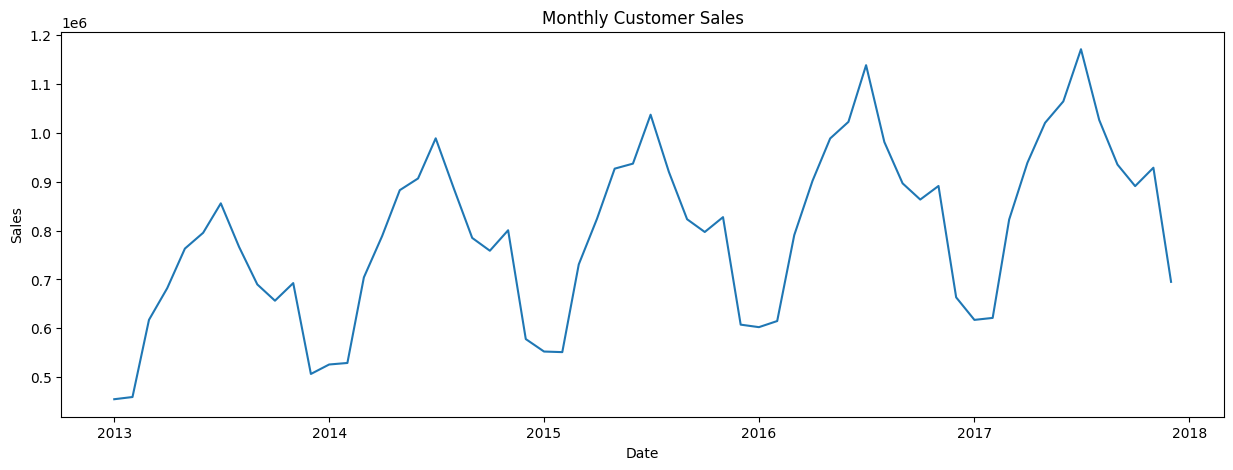

In [12]:
# Monthly sales
plt.figure(figsize = (15,5))
plt.plot(monthly_sales['date'], monthly_sales['sales'])

# Customize the plot
plt.title('Monthly Customer Sales')
plt.xlabel('Date')
plt.ylabel('Sales')

# Show the plot
plt.show()

In [13]:
# Call the difference on the sales column to make the sales data stationary
monthly_sales['sales_diff'] = monthly_sales['sales'].diff()
monthly_sales = monthly_sales.dropna()
monthly_sales.head()

,date,sales,sales_diff
1,2013-02-01,459417,4513.0
2,2013-03-01,617382,157965.0
3,2013-04-01,682274,64892.0
4,2013-05-01,763242,80968.0
5,2013-06-01,795597,32355.0


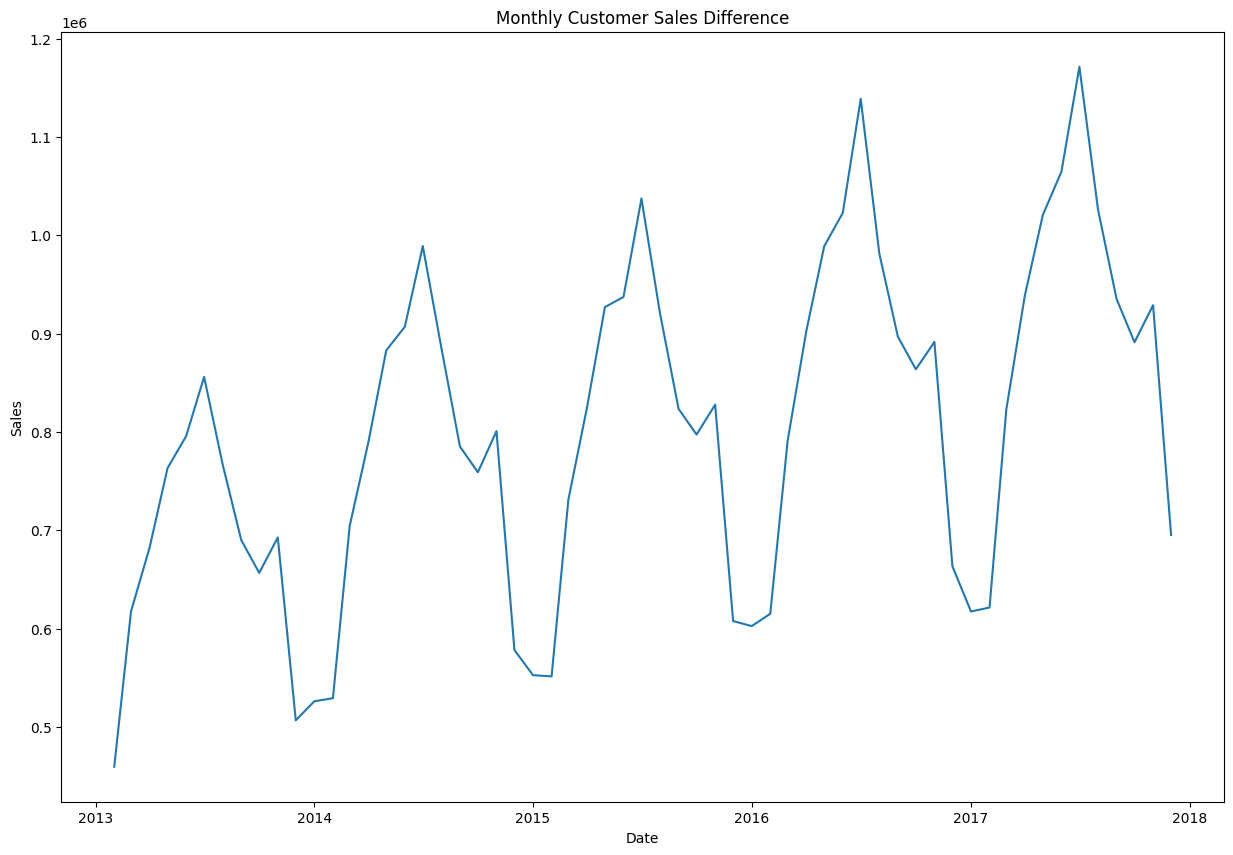

In [14]:
plt.figure(figsize = (15,10))
plt.plot(monthly_sales['date'], monthly_sales['sales'])

# Customize the plot
plt.title('Monthly Customer Sales Difference')
plt.xlabel('Date')
plt.ylabel('Sales')

# Show the plot
plt.show()

## Preprocessing

In [15]:
# Dropping date and sales and use sales_diff to train the model
supervised_data = monthly_sales.drop(['date', 'sales'], axis = 1)

preparing the supervised data

In [16]:
for i in range (1,13): 
    col_name = 'month_' + str(i)
    supervised_data[col_name] = supervised_data['sales_diff'].shift(i)

supervised_data = supervised_data.dropna().reset_index(drop = True)

supervised_data.head(10)

,sales_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0,4513.0
1,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0
2,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0
3,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0
4,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0
5,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0
6,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0
7,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0
8,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0
9,41900.0,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0


In [17]:
# Split data into train and test
train_data = supervised_data[:-12]
test_data = supervised_data[-12:]
print('Train Data shape', train_data.shape)
print('Test Data shape', test_data.shape)

Train Data shape (35, 13)
Test Data shape (12, 13)


In [18]:
# Scaling data
scaler = MinMaxScaler(feature_range = (-1,1))
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [19]:
x_train, y_train = train_data[:,1:], train_data[:, 0:1]
x_test, y_test = test_data[:,1:], test_data[:, 0:1]

In [20]:
# Convert to one dimensional array
y_train = y_train.ravel()
y_test = y_test.ravel()

In [21]:
# Make prediction data frame
sales_dates = monthly_sales['date'][-12:].reset_index(drop = True)
predict_df = pd.DataFrame(sales_dates)

In [22]:
act_sales = monthly_sales['sales'][-13:].to_list()

## Train the model

### Create the Linear Regression and predicted output

In [23]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_pre = lr_model.predict(x_test)

In [24]:
lr_pre = lr_pre.reshape(-1,1)
# set matrix which contains the input features of the test data and predicted output
lr_pre_test_set = np.concatenate([lr_pre, x_test], axis = 1)
lr_pre_test_set = scaler.inverse_transform(lr_pre_test_set)

In [25]:
result_list = []
for index in range(0, len(lr_pre_test_set)):
    result_list.append(lr_pre_test_set[index][0] + act_sales[index])

lr_pre_series = pd.Series(result_list, name='Linear Prediction')
predict_df = pd.concat([predict_df, lr_pre_series], axis=1)

## Model Evaluation

In [26]:
lr_mse = np.sqrt(mean_squared_error(predict_df['Linear Prediction'], monthly_sales['sales'][-12:]))
lr_mae = mean_absolute_error(predict_df['Linear Prediction'], monthly_sales['sales'][-12:])
lr_r2 = r2_score(predict_df['Linear Prediction'], monthly_sales['sales'][-12:])

print('Linear Regression MSE: ', lr_mse)
print('Linear Regression MAE: ', lr_mae)
print('Linear Regression R2: ', lr_r2)

Linear Regression MSE:  16221.272385416896
Linear Regression MAE:  12433.184266490784
Linear Regression R2:  0.9906152516380968


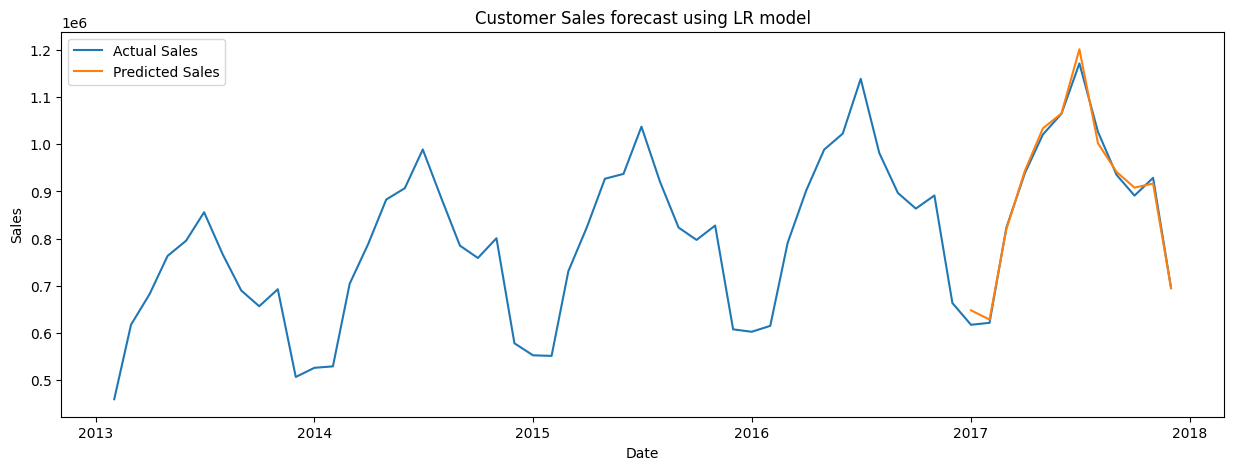

In [27]:
# Visualization of the prediction againt actual sales
plt.figure(figsize = (15,5))
# Actual sales
plt.plot(monthly_sales['date'], monthly_sales['sales'])

# Predicted sales
plt.plot(predict_df['date'], predict_df['Linear Prediction'])
plt.title('Customer Sales forecast using LR model')
plt.xlabel('Date')
plt.ylabel('Sales')

plt.legend(['Actual Sales', 'Predicted Sales'])
plt.show()